<a href="https://colab.research.google.com/github/handochan/PetitionWor2vec/blob/master/Perition_Doc2vec_vote100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
import re
import matplotlib as mpl
import matplotlib.font_manager as fm
import warnings
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
mpl.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()
warnings.filterwarnings('ignore')

In [0]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
cd /content/gdrive/My Drive/

/content/gdrive/My Drive


In [0]:

!pip install soynlp
!pip show soynlp

Name: soynlp
Version: 0.0.493
Summary: Unsupervised Korean Natural Language Processing Toolkits
Home-page: https://github.com/lovit/soynlp
Author: Lovit
Author-email: soy.lovit@gmail.com
License: UNKNOWN
Location: /usr/local/lib/python3.6/dist-packages
Requires: scikit-learn, numpy, psutil, scipy
Required-by: 


In [0]:
# !pip install gensim
!pip show gensim

Name: gensim
Version: 3.6.0
Summary: Python framework for fast Vector Space Modelling
Home-page: http://radimrehurek.com/gensim
Author: Radim Rehurek
Author-email: me@radimrehurek.com
License: LGPLv2.1
Location: /usr/local/lib/python3.6/dist-packages
Requires: numpy, six, scipy, smart-open
Required-by: 


In [0]:
#국민청원 데이터 불러오기 2017.08.19~2019.02.04
petitions = pd.read_csv('https://s3.ap-northeast-2.amazonaws.com/data10902/petition/petition.csv', parse_dates=['start', 'end'])
petitions.shape

(395547, 8)

In [0]:
petitions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395547 entries, 0 to 395546
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   article_id  395547 non-null  int64         
 1   start       395547 non-null  datetime64[ns]
 2   end         395547 non-null  datetime64[ns]
 3   answered    395547 non-null  int64         
 4   votes       395547 non-null  int64         
 5   category    395547 non-null  object        
 6   title       395547 non-null  object        
 7   content     395546 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 24.1+ MB


In [0]:
petitions.info

<bound method DataFrame.info of         article_id  ...                                            content
0               21  ...  스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
1               22  ...  현 정부에 국민들이 가장 원하는 것은 부패척결입니다.  우리 사회에 각종 비리들이 ...
2               23  ...  만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ...
3               24  ...  현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
4               25  ...  만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ...
...            ...  ...                                                ...
395542      517117  ...  명절고속도로 무료보단 대다수의 서민들이 이용하는 대중교통 무료와 명절기간 증차로 했...
395543      517119  ...  광주사태 유공자들 차고 넘치는데 이래 많은 유공자들 그냥놓아두면 재앙이다.\n김대중...
395544      517120  ...  명절이면 후로 제일문제는 쓰레기 문제 입니다.\n제일문제는 선물세트와 농산물세트 입...
395545      517121  ...  좌파 더불어민주당, 좌파 정권 청화대는 선한 국민들을 더는 기망하지 말고 담장 답하...
395546      517122  ...                              국민들이 원합니다\n폐지 좀 시키세요;

[395547 rows x 8 columns]>

In [0]:
petitions.head()

,article_id,start,end,answered,votes,category,title,content
0,21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
1,22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...
2,23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
3,24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
4,25,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."


In [0]:
petitions.tail()

,article_id,start,end,answered,votes,category,title,content
395542,517117,2019-02-04,2019-03-06,0,3,보건복지,명절연휴 고속도로 무료반대,명절고속도로 무료보단 대다수의 서민들이 이용하는 대중교통 무료와 명절기간 증차로 했...
395543,517119,2019-02-04,2019-03-06,0,23,보건복지,광주사태 가짜 유공자들 정수기로 걸려내야함,광주사태 유공자들 차고 넘치는데 이래 많은 유공자들 그냥놓아두면 재앙이다.\n김대중...
395544,517120,2019-02-04,2019-03-06,0,0,안전/환경,환경문제,명절이면 후로 제일문제는 쓰레기 문제 입니다.\n제일문제는 선물세트와 농산물세트 입...
395545,517121,2019-02-04,2019-03-06,0,20,정치개혁,"청화대,더불어민주당, 당장 답하라,,,,,,","좌파 더불어민주당, 좌파 정권 청화대는 선한 국민들을 더는 기망하지 말고 담장 답하..."
395546,517122,2019-02-04,2019-03-06,0,16,인권/성평등,여성부 폐지,국민들이 원합니다\n폐지 좀 시키세요;


In [0]:
#같은 제목의 중복된 게시글 제거
petitions['title_']=petitions['title'].apply(lambda x : x.split())
petitions

,article_id,start,end,answered,votes,category,title,content,title_
0,21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...,"[스텔라, 데이지호에, 대한, 제안입니다.]"
1,22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...,"[비리제보처를, 만들어주세요.]"
2,23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ...","[제2의, 개성공단]"
3,24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...,"[공공기관, 무조건적인, 정규직전환을, 반대합니다.]"
4,25,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ...","[제2의, 개성공단]"
...,...,...,...,...,...,...,...,...,...
395542,517117,2019-02-04,2019-03-06,0,3,보건복지,명절연휴 고속도로 무료반대,명절고속도로 무료보단 대다수의 서민들이 이용하는 대중교통 무료와 명절기간 증차로 했...,"[명절연휴, 고속도로, 무료반대]"
395543,517119,2019-02-04,2019-03-06,0,23,보건복지,광주사태 가짜 유공자들 정수기로 걸려내야함,광주사태 유공자들 차고 넘치는데 이래 많은 유공자들 그냥놓아두면 재앙이다.\n김대중...,"[광주사태, 가짜, 유공자들, 정수기로, 걸려내야함]"
395544,517120,2019-02-04,2019-03-06,0,0,안전/환경,환경문제,명절이면 후로 제일문제는 쓰레기 문제 입니다.\n제일문제는 선물세트와 농산물세트 입...,[환경문제]
395545,517121,2019-02-04,2019-03-06,0,20,정치개혁,"청화대,더불어민주당, 당장 답하라,,,,,,","좌파 더불어민주당, 좌파 정권 청화대는 선한 국민들을 더는 기망하지 말고 담장 답하...","[청화대,더불어민주당,, 당장, 답하라,,,,,,]"


In [0]:
a=petitions['title_']
petitions['title_']=a.apply(lambda x: "".join(x))

In [0]:
petitions

,article_id,start,end,answered,votes,category,title,content,title_
0,21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...,스텔라데이지호에대한제안입니다.
1,22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...,비리제보처를만들어주세요.
2,23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ...",제2의개성공단
3,24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...,공공기관무조건적인정규직전환을반대합니다.
4,25,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ...",제2의개성공단
...,...,...,...,...,...,...,...,...,...
395542,517117,2019-02-04,2019-03-06,0,3,보건복지,명절연휴 고속도로 무료반대,명절고속도로 무료보단 대다수의 서민들이 이용하는 대중교통 무료와 명절기간 증차로 했...,명절연휴고속도로무료반대
395543,517119,2019-02-04,2019-03-06,0,23,보건복지,광주사태 가짜 유공자들 정수기로 걸려내야함,광주사태 유공자들 차고 넘치는데 이래 많은 유공자들 그냥놓아두면 재앙이다.\n김대중...,광주사태가짜유공자들정수기로걸려내야함
395544,517120,2019-02-04,2019-03-06,0,0,안전/환경,환경문제,명절이면 후로 제일문제는 쓰레기 문제 입니다.\n제일문제는 선물세트와 농산물세트 입...,환경문제
395545,517121,2019-02-04,2019-03-06,0,20,정치개혁,"청화대,더불어민주당, 당장 답하라,,,,,,","좌파 더불어민주당, 좌파 정권 청화대는 선한 국민들을 더는 기망하지 말고 담장 답하...","청화대,더불어민주당,당장답하라,,,,,,"


In [0]:
petitions=petitions.drop_duplicates(['title_'])
petitions.shape

(340389, 9)

In [0]:
#동의수 1000 이상 100000 이하의 데이터만
df = petitions.loc[(petitions['votes'] > 1000) & (petitions['votes'] < 100000)].copy()
df.reset_index(drop=True,inplace=True)
df.head(100)

,article_id,start,end,answered,votes,category,title,content,title_
0,28,2017-08-19,2017-08-26,0,2137,경제민주화,소액주주를 보호해주십시오,** 존경하옵는 문재인대통령님께\n저는 중국원양자원이라는 KOSPI상장사의 소액 ...,소액주주를보호해주십시오
1,50,2017-08-19,2017-10-18,0,1251,일자리,치과위생사 국가고시 날짜 변경 억울합니다,안녕하십니까? 대통령님 간단하게 제소개 부터 하겠습니다. 저는 치위생과 3학년 학생...,치과위생사국가고시날짜변경억울합니다
2,69,2017-08-20,2017-09-04,0,4934,육아/교육,"영어전문강사, 스포츠전문강사를 무기계약직 혹은 정규직으로 전환하는 것에 반대합니다",저는 30대 초반에 수능 다시 공부해서 교대에 다니고 있는 교대생입니다. 회사에 다...,"영어전문강사,스포츠전문강사를무기계약직혹은정규직으로전환하는것에반대합니다"
3,71,2017-08-20,2017-09-19,0,4484,육아/교육,"영양 교사 폐지, 영양직 직렬 신설을 청원합니다.",대통령님께서 대선 후보이시던 시절 충격적인 기사를 접했습니다. 영양사 단체 행사에서...,"영양교사폐지,영양직직렬신설을청원합니다."
4,75,2017-08-20,2017-09-04,0,6420,육아/교육,수능 상대평가 유지 정시확대,기회의 사다리이자 가장 공정한 수능 상대평가 유지와 정시확대를 원합니다 사걱세나 전...,수능상대평가유지정시확대
...,...,...,...,...,...,...,...,...,...
95,14705,2017-09-18,2017-10-18,0,8030,안전/환경,발암물질 생리대 즉각 단속하고 대안 마련에 힘써주세요.,얼마 전 발암물질이 검출된 생리대 파동으로 한동안 나라가 시끄러웠던 기억이 납니다....,발암물질생리대즉각단속하고대안마련에힘써주세요.
96,14979,2017-09-19,2017-10-19,0,2174,일자리,지역인재 채용 할당제를 강력히 반대합니다.,"문재인 대통령은 ""기회는 평등할 것 입니다. 과정은 공정할 것 입니다. 결과는 정의...",지역인재채용할당제를강력히반대합니다.
97,15569,2017-09-20,2017-10-20,0,1705,기타,화훼도매시장 출입에 대한 출입증 발급을 청원합니다,화훼쪽에 종사하고 있는 사람입니다\n김영란법이 터지고 나서 뉴스를 보면 양재화훼시장...,화훼도매시장출입에대한출입증발급을청원합니다
98,15602,2017-09-20,2017-10-20,0,5184,경제민주화,공매도 폐지,주가를 왜곡하고 정당한 개인투자의 기회를 박탈하는 적폐 중의 적폐 공매도 폐지를 건...,공매도폐지


In [0]:
#동의수 100이상의 데이터만
df2 = petitions.loc[(petitions['votes']> 100)].copy()
df2.reset_index(drop=True,inplace=True)
df2

,article_id,start,end,answered,votes,category,title,content,title_
0,28,2017-08-19,2017-08-26,0,2137,경제민주화,소액주주를 보호해주십시오,** 존경하옵는 문재인대통령님께\n저는 중국원양자원이라는 KOSPI상장사의 소액 ...,소액주주를보호해주십시오
1,34,2017-08-19,2017-09-18,0,679,기타,『국가유공자 등 예우 및 지원에 관한법률』상「6.25전몰군경 자녀수당」의 불합리한 ...,(현황)\n우리들 아버지께서는 67여년전 북의 남침으로 조국이 위기에 처했을 때 젊...,『국가유공자등예우및지원에관한법률』상「6.25전몰군경자녀수당」의불합리한문제점개선청원
2,37,2017-08-19,2017-09-18,0,415,기타,황우석박사님 연구재개 허용 촉구합니다.,국민의 70% 이상이 황우석박사님을 응원하고 지지하고 있습니다.\n*2007년 1월...,황우석박사님연구재개허용촉구합니다.
3,40,2017-08-19,2017-09-18,0,218,외교/통일/국방,국가유공자등 예우및 지우너에 관한 법률 시행령 개정,지금부터 67년전 1950년 6.25전쟁때 조국 대한민국이 위태로운 시점에 우리들 ...,국가유공자등예우및지우너에관한법률시행령개정
4,42,2017-08-19,2017-09-18,0,173,육아/교육,기간제 교사의 정규직화를 반대합니다.,"대통령님, 안녕하세요. 저는 임용을 준비하고 수험생입니다. 처음 기간제 정규직화 된...",기간제교사의정규직화를반대합니다.
...,...,...,...,...,...,...,...,...,...
17343,516826,2019-02-04,2019-03-06,0,232,행정,"대한민국 공법단체(상이군경회, 고엽제전우회(월남참전전우회포함), 특수임무유공자회 하...","1. 각기 공법단체가 따로 수익사업을 하고 있어 비리가 끝이지 않고, 전국 각 지자...","대한민국공법단체(상이군경회,고엽제전우회(월남참전전우회포함),특수임무유공자회하나로통합..."
17344,516901,2019-02-04,2019-03-06,0,718,외교/통일/국방,대한민국 예비역 장성모임(성우회)를 구성하고 있는 전직 고위장성들의 연금을 박탈하고...,올해는 3.1운동과 임시정부 수립 100주년을 맞는 해입니다. 더구나 시민들의 촛불...,대한민국예비역장성모임(성우회)를구성하고있는전직고위장성들의연금을박탈하고그들의매국적인행...
17345,517037,2019-02-04,2019-03-06,0,938,인권/성평등,"군,경의 90% 남성할당제. 공정한 기회는 도대체 누구에게 주어졌습니까?","일부 공무원시험에서도, 경찰대학교나 사관학교에서도, 또한 군과 협약을 맺은 여타 고...","군,경의90%남성할당제.공정한기회는도대체누구에게주어졌습니까?"
17346,517038,2019-02-04,2019-03-06,0,186,인권/성평등,남성차별하는 여성가족부를 폐지하라,여성가족부 폐지 운동을 하고 있습니다. 여성가족부는 일년예산으로만 1조2천억 이라는...,남성차별하는여성가족부를폐지하라


In [0]:
"""
df_id_cat=df2[['article_id','category']]
df_id_cat
"""

"\ndf_id_cat=df2[['article_id','category']]\ndf_id_cat\n"

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


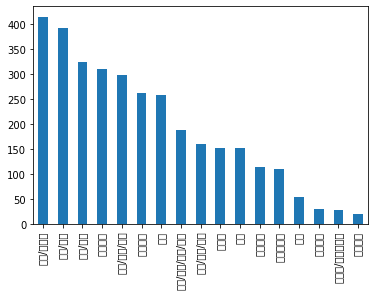

In [0]:
#각 카테고리의 수, 
category_count = df['category'].value_counts()
category_count
%matplotlib inline
category_count.plot(kind='bar')

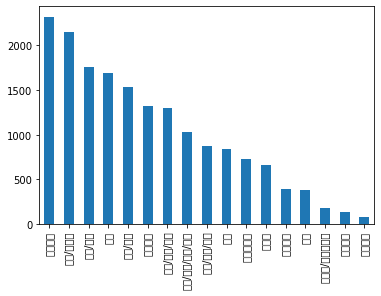

In [0]:
category_count = df2['category'].value_counts()
category_count
%matplotlib inline
category_count.plot(kind='bar')

In [0]:
sample_index = 38
sample_content = df2['content'][sample_index]
sample_title = df2['title'][sample_index]

In [0]:
def preprocessing(text):

    # 개행문자 제거
  text= str(text)
  text = re.sub('\\\\n', ' ', text)
    # 특수문자 제거
    # 특수문자나 이모티콘 등은 때로는 의미를 갖기도 하지만 여기에서는 제거했습니다.
  text = re.sub('[?.,;:|\)*~`’!^\-_+<>@\#$%&-=#}※]', '', text)
    # 한글, 영문, 숫자만 남기고 모두 제거하도록 합니다.
    # text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z0-9]', ' ', text)
    # 한글, 영문만 남기고 모두 제거하도록 합니다.
  text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z]', ' ', text)
  return text
# 불용어 제거
def remove_stopwords(text):
    tokens = text.split(' ')
    stops = ['수', '현', '있는', '있습니다', '그', '년도', '합니다', '하는', '및', '제', '할', '하고', '더', '대한', '한', '그리고', '월', '저는', '없는', '입니다', '등', '일', '많은', '이런', '것은', '왜','같은', '같습니다', '없습니다', '위해', '한다','이', '년', '것입니다', '또한', '현재', '것이', '우리', '모든', '않고', '것을', '위한', '생각합니다', '저희', '것', '너무', '때문에', '대해', '중', '또', '다시', '아니라', '후', '바랍니다', '있도록', '아닌', '지금', '통해', '이렇게']
    meaningful_words = [w for w in tokens if not w in stops]
    return ' '.join(meaningful_words)
# 샘플데이터에 적용
pre_sample_content = preprocessing(sample_content)
pre_sample_content = remove_stopwords(pre_sample_content)

In [0]:
%time presentences1 = df['content'].apply(preprocessing)
%time sentences1 = presentences1.apply(remove_stopwords)

CPU times: user 328 ms, sys: 6.31 ms, total: 334 ms
Wall time: 337 ms
CPU times: user 737 ms, sys: 3.83 ms, total: 741 ms
Wall time: 743 ms


In [0]:
sentences1.head()

0      존경하옵는 문재인대통령님께 중국원양자원이라는 KOSPI상장사의 소액 주주입니다 ...
1    안녕하십니까 대통령님 간단하게 제소개 부터 하겠습니다 치위생과 학년 학생입니다 다름...
2    대 초반에 수능 공부해서 교대에 다니고 교대생입니다 회사에 다니다 교사의 꿈을 갖게...
3    대통령님께서 대선 후보이시던 시절 충격적인 기사를 접했습니다 영양사 단체 행사에서 ...
4    기회의 사다리이자 가장 공정한 수능 상대평가 유지와 정시확대를 원합니다 사걱세나 전...
Name: content, dtype: object

In [0]:
%time presentences2 = df2['content'].apply(preprocessing)
%time sentences2 = presentences2.apply(remove_stopwords)

CPU times: user 1.25 s, sys: 19.6 ms, total: 1.27 s
Wall time: 1.27 s
CPU times: user 2.65 s, sys: 934 µs, total: 2.65 s
Wall time: 2.65 s


In [0]:
sentences2.head()

0      존경하옵는 문재인대통령님께 중국원양자원이라는 KOSPI상장사의 소액 주주입니다 ...
1    현황 우리들 아버지께서는 여년전 북의 남침으로 조국이 위기에 처했을 때 젊은 목숨 ...
2    국민의  이상이 황우석박사님을 응원하고 지지하고 중앙일보 여론조 국민 여론조사   ...
3    지금부터 년전 전쟁때 조국 대한민국이 위태로운 시점에 우리들 아버님께서는 조국의 부...
4    대통령님 안녕하세요 임용을 준비하고 수험생입니다 처음 기간제 정규직화 된다고 했을 ...
Name: content, dtype: object

In [0]:
from soynlp.tokenizer import RegexTokenizer

tokenizer = RegexTokenizer()
tokenizer

In [0]:
# 전처리 이전의 샘플 텍스트로 토큰화
tokened_title = tokenizer.tokenize(sample_title)
tokened_title

['2016', '년', '11.3', '부동산대책중', '도시정비사업의', '불합리한', '부분의', '시정을', '요청합니다', '.']

In [0]:
# 전처리 이후의 샘플 텍스트로 토큰화
tokened_content = tokenizer.tokenize(sample_content)
tokened_content[:30]

['최근의',
 '부동산시장',
 '과열로',
 '인한',
 '정부의',
 '대책들에',
 '대해',
 '일부',
 '무리한',
 '측면이',
 '없는',
 '것은',
 '아니지만',
 '전체적으로는',
 '공감을',
 '표하며',
 '정부가',
 '바라는',
 '부동산시장의',
 '안정화가',
 '최대한',
 '이른',
 '시간내에',
 '\\',
 'n',
 '그',
 '효과가',
 '나오기를',
 '바랍니다',
 '.\\']

In [0]:
%time tokens1 = sentences1.apply(tokenizer.tokenize)
tokens1[:5]

CPU times: user 4.72 s, sys: 26.9 ms, total: 4.75 s
Wall time: 4.76 s


0    [존경하옵는, 문재인대통령님께, 중국원양자원이라는, KOSPI, 상장사의, 소액, ...
1    [안녕하십니까, 대통령님, 간단하게, 제소개, 부터, 하겠습니다, 치위생과, 학년,...
2    [대, 초반에, 수능, 공부해서, 교대에, 다니고, 교대생입니다, 회사에, 다니다,...
3    [대통령님께서, 대선, 후보이시던, 시절, 충격적인, 기사를, 접했습니다, 영양사,...
4    [기회의, 사다리이자, 가장, 공정한, 수능, 상대평가, 유지와, 정시확대를, 원합...
Name: content, dtype: object

In [0]:
%time tokens2 = sentences2.apply(tokenizer.tokenize)
tokens2[:5]

CPU times: user 17.2 s, sys: 126 ms, total: 17.3 s
Wall time: 17.3 s


0    [존경하옵는, 문재인대통령님께, 중국원양자원이라는, KOSPI, 상장사의, 소액, ...
1    [현황, 우리들, 아버지께서는, 여년전, 북의, 남침으로, 조국이, 위기에, 처했을...
2    [국민의, 이상이, 황우석박사님을, 응원하고, 지지하고, 중앙일보, 여론조, 국민,...
3    [지금부터, 년전, 전쟁때, 조국, 대한민국이, 위태로운, 시점에, 우리들, 아버님...
4    [대통령님, 안녕하세요, 임용을, 준비하고, 수험생입니다, 처음, 기간제, 정규직화...
Name: content, dtype: object

In [0]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [0]:
df2['article_id']

0            28
1            34
2            37
3            40
4            42
          ...  
17343    516826
17344    516901
17345    517037
17346    517038
17347    517095
Name: article_id, Length: 17348, dtype: int64

In [0]:
documents = [TaggedDocument(doc, [df2['article_id'][i]]) for i, doc in enumerate(tokens2)]

In [0]:
documents[:5]

[TaggedDocument(words=['존경하옵는', '문재인대통령님께', '중국원양자원이라는', 'KOSPI', '상장사의', '소액', '주주입니다', '중국원양자원이하', '중원은', '이번', '재회계감사에서', '의견거절이라는', '감사인', '판단이', '내려져', '꿈에도', '생각못한', '상장폐지를', '목전에', '두고', '상장폐지가되면', '국내에', '상장하여', '천문학적인', '금액을', '취득하여', '회사의', '규모를', '키우고', '개인자산을', '불린', '자신의', '지분도', '다', '팔아서', '이득을', '챙긴', '중국인', '장화리', '사장은', '정리매매때', '휴지조각의', '비용으로', '자신의', '지분을', '사들이고', '대주주로서의', '지위를', '획득하여', '온전히', '자신의', '기업으로', '만들수', '결국', '한국', '국민들의', '피땀어린', '투자금으로', '중국인', '사장의', '부를', '채워주지만', '이에', '한국의', '금융당국', '상장과', '운영의', '주체인', '거래소는', '누구도', '이에대한', '책임없이', '이를', '그냥', '덮어버리고만', '말것입니다', '이로인해', '약', '만', '천의', '국내소액주주는', '피눈물을', '흘리며', '고통속에', '살게', '될', '주식투자는', '개인의', '판단하에', '이루어지는', '것이나', '투자에', '개인의', '책임을', '묻기전에', '과정은', '규정과', '상식에', '맞게', '공정하고', '정의로워야', '이는', '존경하는', '문대통령님의', '말씀이라', '가슴깊이', '새기고', '있었으나', '우리나라의', '금융', '시스템', '특히', '거래소와', '회계감사는', '그렇지', '못한', '생각하게된', '이유는', '이번', '회계감사의', '주된', '의견거절의', '이유', '때문입니다', '이번', '신한회계법인의', '추측적이고', '터무니없는

In [0]:
import logging
logging.basicConfig(
    format='%(asctime)s : %(levelname)s : %(message)s', 
    level = logging.INFO)

In [0]:
"""
import multiprocessing
cores = multiprocessing.thread_count()
cores
"""

2

In [0]:
docmodel = Doc2Vec(documents, size = 300, min_count=5, window=10, iter = 100) #workers = cores)

2020-06-10 15:43:47,139 : INFO : collecting all words and their counts
2020-06-10 15:43:47,140 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2020-06-10 15:43:47,792 : INFO : PROGRESS: at example #10000, processed 1672540 words (2575806/s), 362748 word types, 301524 tags
2020-06-10 15:43:48,371 : INFO : collected 569930 word types and 517096 unique tags from a corpus of 17348 examples and 3105981 words
2020-06-10 15:43:48,372 : INFO : Loading a fresh vocabulary
2020-06-10 15:43:48,909 : INFO : effective_min_count=5 retains 71877 unique words (12% of original 569930, drops 498053)
2020-06-10 15:43:48,911 : INFO : effective_min_count=5 leaves 2417980 word corpus (77% of original 3105981, drops 688001)
2020-06-10 15:43:49,165 : INFO : deleting the raw counts dictionary of 569930 items
2020-06-10 15:43:49,177 : INFO : sample=0.001 downsamples 0 most-common words
2020-06-10 15:43:49,179 : INFO : downsampling leaves estimated 2417980 word corpus (100.0% of pr

In [0]:
docmodel.save('model0611')

2020-06-10 16:07:27,694 : INFO : saving Doc2Vec object under model0611, separately None
2020-06-10 16:07:27,697 : INFO : storing np array 'syn1neg' to model0611.trainables.syn1neg.npy
2020-06-10 16:07:28,011 : INFO : storing np array 'vectors' to model0611.wv.vectors.npy
2020-06-10 16:07:28,333 : INFO : storing np array 'vectors_docs' to model0611.docvecs.vectors_docs.npy
2020-06-10 16:07:31,060 : INFO : saved model0611


In [0]:
docmodel= Doc2Vec.load("model0611")

2020-06-11 05:46:34,911 : INFO : loading Doc2Vec object from model0611
2020-06-11 05:46:35,291 : INFO : loading vocabulary recursively from model0611.vocabulary.* with mmap=None
2020-06-11 05:46:35,292 : INFO : loading trainables recursively from model0611.trainables.* with mmap=None
2020-06-11 05:46:35,295 : INFO : loading syn1neg from model0611.trainables.syn1neg.npy with mmap=None
2020-06-11 05:46:35,441 : INFO : loading wv recursively from model0611.wv.* with mmap=None
2020-06-11 05:46:35,442 : INFO : loading vectors from model0611.wv.vectors.npy with mmap=None
2020-06-11 05:46:35,587 : INFO : loading docvecs recursively from model0611.docvecs.* with mmap=None
2020-06-11 05:46:35,588 : INFO : loading vectors_docs from model0611.docvecs.vectors_docs.npy with mmap=None
2020-06-11 05:46:36,632 : INFO : loaded model0611


In [0]:
article_list=list(df2['article_id'])
category_list = df2['category']

In [0]:
list(set(category_list))


['저출산/고령화대책',
 '보건복지',
 '교통/건축/국토',
 '육아/교육',
 '반려동물',
 '문화/예술/체육/언론',
 '정치개혁',
 '인권/성평등',
 '미래',
 '경제민주화',
 '행정',
 '안전/환경',
 '일자리',
 '성장동력',
 '기타',
 '외교/통일/국방',
 '농산어촌']

In [0]:
article_list

In [0]:
tsne_x=docmodel[article_list]
tsne_x.shape

(17348, 300)

In [0]:
tsne_x[:5]

array([[ 3.6942704 , -0.19099683, -0.13060199, ..., -1.6680932 ,
        -0.7361695 , -4.383167  ],
       [-2.7797017 ,  0.5145248 , -1.2674987 , ...,  0.24807112,
         0.84234595,  1.4108208 ],
       [ 0.65303695,  0.80126476, -0.2029134 , ..., -0.0874755 ,
         0.12299104,  0.37884176],
       [-0.61697435,  1.4064002 , -2.1773882 , ...,  0.02150915,
         0.49303177,  1.3688459 ],
       [ 2.3851435 ,  2.147308  , -0.9987728 , ..., -1.0472605 ,
         0.22305341, -1.7288204 ]], dtype=float32)

In [0]:
!pip install MulticoreTSNE

In [0]:
from MulticoreTSNE import MulticoreTSNE as TSNE

In [0]:
tsne = TSNE(n_components=3, random_state=0, n_jobs=8)
X_t = tsne.fit_transform(tsne_x)
X_t

array([[-10.05066661,  14.9466304 ,  -4.54011652],
       [-12.6347785 ,  22.28195912,   1.3696196 ],
       [-10.79981501,  -3.25265238,  -0.45152655],
       ...,
       [  9.27739441,  14.79698027, -10.50952223],
       [  9.20404427,  14.79733391, -10.45733132],
       [-16.34829289,  11.72499394,   0.67087137]])

In [0]:
X_t.shape

(17348, 3)

In [0]:
x = X_t[:, 0]
y = X_t[:, 1]
z = X_t[:, 2]

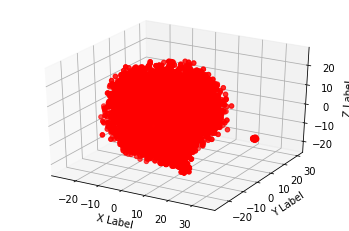

In [0]:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

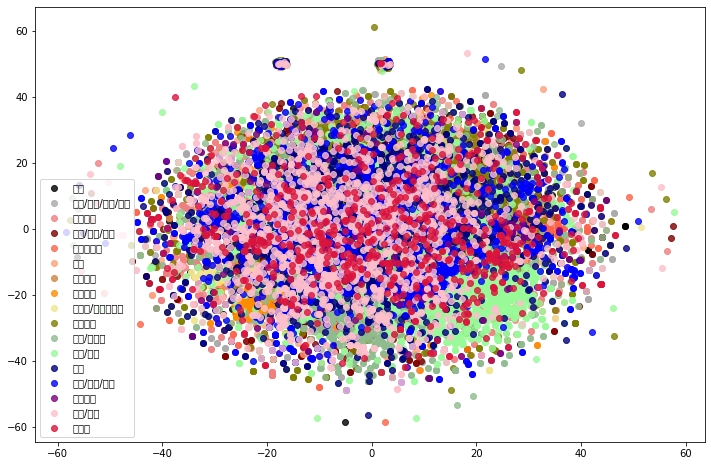

In [0]:
"""
def tsne_plot(x1, y1, name="graph.png"):
    tsne = TSNE(n_components=2, random_state=0)
    X_t = tsne.fit_transform(x1)

    plt.figure(figsize=(12, 8))
    plt.scatter(X_t[np.where(y1 == '미래'), 0],X_t[np.where(y1 == '미래'), 1], marker='o', color='black', linewidth='1', alpha=0.8, label='미래')
    plt.scatter(X_t[np.where(y1 == '문화/예술/체육/언론'), 0], X_t[np.where(y1 == '문화/예술/체육/언론'), 1], marker='o', color='darkgrey', linewidth='1', alpha=0.8, label='문화/예술/체육/언론')
    plt.scatter(X_t[np.where(y1 == '보건복지'), 0], X_t[np.where(y1 == '보건복지'), 1], marker='o', color='lightcoral', linewidth='1', alpha=0.8, label='보건복지')
    plt.scatter(X_t[np.where(y1 == '외교/통일/국방'), 0],X_t[np.where(y1 == '외교/통일/국방'), 1], marker='o', color='maroon', linewidth='1', alpha=0.8, label='외교/통일/국방')
    plt.scatter(X_t[np.where(y1 == '경제민주화'), 0], X_t[np.where(y1 == '경제민주화'), 1], marker='o', color='tomato', linewidth='1', alpha=0.8, label='경제민주화')
    plt.scatter(X_t[np.where(y1 == '행정'), 0], X_t[np.where(y1 == '행정'), 1], marker='o', color='lightsalmon', linewidth='1', alpha=0.8, label='행정')
    plt.scatter(X_t[np.where(y1 == '농산어촌'), 0],X_t[np.where(y1 == '농산어촌'), 1], marker='o', color='peru', linewidth='1', alpha=0.8, label='농산어촌')
    plt.scatter(X_t[np.where(y1 == '반려동물'), 0], X_t[np.where(y1 == '반려동물'), 1], marker='o', color='darkorange', linewidth='1', alpha=0.8, label='반려동물')
    plt.scatter(X_t[np.where(y1 == '저출산/고령화대책'), 0],X_t[np.where(y1 == '저출산/고령화대책'), 1], marker='o', color='khaki', linewidth='1', alpha=0.8, label='저출산/고령화대책')
    plt.scatter(X_t[np.where(y1 == '정치개혁'), 0], X_t[np.where(y1 == '정치개혁'), 1], marker='o', color='olive', linewidth='1', alpha=0.8, label='정치개혁')
    plt.scatter(X_t[np.where(y1 == '인권/성평등'), 0],X_t[np.where(y1 == '인권/성평등'), 1], marker='o', color='darkseagreen', linewidth='1', alpha=0.8, label='인권/성평등')
    plt.scatter(X_t[np.where(y1 == '육아/교육'), 0], X_t[np.where(y1 == '육아/교육'), 1], marker='o', color='palegreen', linewidth='1', alpha=0.8, label='육아/교육')
    plt.scatter(X_t[np.where(y1 == '기타'), 0],X_t[np.where(y1 == '기타'), 1], marker='o', color='navy', linewidth='1', alpha=0.8, label='기타')
    plt.scatter(X_t[np.where(y1 == '교통/건축/국토'), 0], X_t[np.where(y1 == '교통/건축/국토'), 1], marker='o', color='blue', linewidth='1', alpha=0.8, label='교통/건축/국토')
    plt.scatter(X_t[np.where(y1 == '성장동력'), 0],X_t[np.where(y1 == '성장동력'), 1], marker='o', color='purple', linewidth='1', alpha=0.8, label='성장동력')
    plt.scatter(X_t[np.where(y1 == '안전/환경'), 0],X_t[np.where(y1 == '안전/환경'), 1], marker='o', color='pink', linewidth='1', alpha=0.8, label='안전/환경')
    plt.scatter(X_t[np.where(y1 == '일자리'), 0],X_t[np.where(y1 == '일자리'), 1], marker='o', color='crimson', linewidth='1', alpha=0.8, label='일자리')
    
    
    plt.legend(loc='best')
    # plt.savefig(name)
    plt.show()
tsne_plot(docmodel[article_list], category_list, name='123')
"""

In [0]:
"""
def tsne_plot(x1, y1, name="graph.png"):
    tsne = TSNE(n_components=3, random_state=0)
    X_t = tsne.fit_transform(x1)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(X_t[np.where(y1 == '미래'), 0],X_t[np.where(y1 == '미래'), 1], X_t[np.where(y1 == '미래'), 2], marker='o', color='black', linewidth='1', alpha=0.8, label='미래')
    ax.scatter(X_t[np.where(y1 == '문화/예술/체육/언론'), 0], X_t[np.where(y1 == '문화/예술/체육/언론'), 1], X_t[np.where(y1 == '문화/예술/체육/언론'), 2], marker='o', color='darkgrey', linewidth='1', alpha=0.8, label='문화/예술/체육/언론')
    ax.scatter(X_t[np.where(y1 == '보건복지'), 0], X_t[np.where(y1 == '보건복지'), 1], X_t[np.where(y1 == '보건복지'), 2], marker='o', color='lightcoral', linewidth='1', alpha=0.8, label='보건복지')
    ax.scatter(X_t[np.where(y1 == '외교/통일/국방'), 0],X_t[np.where(y1 == '외교/통일/국방'), 1], X_t[np.where(y1 == '외교/통일/국방'), 2], marker='o', color='maroon', linewidth='1', alpha=0.8, label='외교/통일/국방')
    ax.scatter(X_t[np.where(y1 == '경제민주화'), 0], X_t[np.where(y1 == '경제민주화'), 1], X_t[np.where(y1 == '경제민주화'), 2], marker='o', color='tomato', linewidth='1', alpha=0.8, label='경제민주화')
    ax.scatter(X_t[np.where(y1 == '행정'), 0], X_t[np.where(y1 == '행정'), 1], X_t[np.where(y1 == '행정'), 2],marker='o', color='lightsalmon', linewidth='1', alpha=0.8, label='행정')
    ax.scatter(X_t[np.where(y1 == '농산어촌'), 0],X_t[np.where(y1 == '농산어촌'), 1], X_t[np.where(y1 == '농산어촌'), 2],marker='o', color='peru', linewidth='1', alpha=0.8, label='농산어촌')
    ax.scatter(X_t[np.where(y1 == '반려동물'), 0], X_t[np.where(y1 == '반려동물'), 1], X_t[np.where(y1 == '반려동물'), 2],marker='o', color='darkorange', linewidth='1', alpha=0.8, label='반려동물')
    ax.scatter(X_t[np.where(y1 == '저출산/고령화대책'), 0],X_t[np.where(y1 == '저출산/고령화대책'), 1], X_t[np.where(y1 == '저출산/고령화대책'), 2], marker='o', color='khaki', linewidth='1', alpha=0.8, label='저출산/고령화대책')
    ax.scatter(X_t[np.where(y1 == '정치개혁'), 0], X_t[np.where(y1 == '정치개혁'), 1], X_t[np.where(y1 == '정치개혁'), 2],marker='o', color='olive', linewidth='1', alpha=0.8, label='정치개혁')
    ax.scatter(X_t[np.where(y1 == '인권/성평등'), 0],X_t[np.where(y1 == '인권/성평등'), 1], X_t[np.where(y1 == '인권/성평등'), 2],marker='o', color='darkseagreen', linewidth='1', alpha=0.8, label='인권/성평등')
    ax.scatter(X_t[np.where(y1 == '육아/교육'), 0], X_t[np.where(y1 == '육아/교육'), 1], X_t[np.where(y1 == '육아/교육'), 2],marker='o', color='palegreen', linewidth='1', alpha=0.8, label='육아/교육')
    ax.scatter(X_t[np.where(y1 == '기타'), 0],X_t[np.where(y1 == '기타'), 1], X_t[np.where(y1 == '기타'), 2],marker='o', color='navy', linewidth='1', alpha=0.8, label='기타')
    ax.scatter(X_t[np.where(y1 == '교통/건축/국토'), 0], X_t[np.where(y1 == '교통/건축/국토'), 1],X_t[np.where(y1 == '교통/건축/국토'), 2], marker='o', color='blue', linewidth='1', alpha=0.8, label='교통/건축/국토')
    ax.scatter(X_t[np.where(y1 == '성장동력'), 0],X_t[np.where(y1 == '성장동력'), 1], X_t[np.where(y1 == '성장동력'), 2], marker='o', color='purple', linewidth='1', alpha=0.8, label='성장동력')
    ax.scatter(X_t[np.where(y1 == '안전/환경'), 0],X_t[np.where(y1 == '안전/환경'), 1], X_t[np.where(y1 == '안전/환경'), 2],marker='o', color='pink', linewidth='1', alpha=0.8, label='안전/환경')
    ax.scatter(X_t[np.where(y1 == '일자리'), 0],X_t[np.where(y1 == '일자리'), 1], X_t[np.where(y1 == '일자리'), 2],marker='o', color='crimson', linewidth='1', alpha=0.8, label='일자리')
    
    
    plt.legend(loc='best')
    plt.savefig(name)
    plt.show()
"""

In [0]:
from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples=1000, noise=0)

In [0]:
t

array([10.27029255, 10.73578471, 13.35180084, 12.74229717, 12.36683459,
        8.96319934,  8.24971548, 10.06086239,  8.84056677, 12.96062457,
       11.13505166, 12.29997254, 10.32854529, 12.29993006,  8.78870802,
        9.59864138, 13.14261   , 12.97918794,  7.97729402,  9.45409087,
       13.77918846,  7.68253188, 10.64807328,  9.72039274,  5.63345954,
        8.75583735,  9.59549194,  9.4891791 ,  8.87444778,  4.91233982,
        8.09869762,  9.93585039,  4.90346372, 11.79818926,  7.03001209,
        7.9954285 , 13.94598476,  4.90517186, 12.81329411, 12.49491556,
       10.88682161,  8.46370739, 11.00870506,  6.4271023 , 11.15775068,
       10.25982914, 13.01751978,  7.2315672 , 12.74848376,  5.64135288,
       14.01766071,  6.16031146, 12.37976709,  9.58057752, 13.49215611,
       13.86121919,  7.28697195, 12.34774873,  9.47215923, 11.25938251,
        7.24092365,  8.26165474,  9.84609453,  6.84670553,  6.99976172,
        5.85744822,  7.92261532, 14.0007499 ,  6.65588563,  5.03

In [0]:
color = (t - t.min()) / (t.max() - t.min())

In [0]:
X

array([[ -6.81276054,   5.2495719 ,  -7.68538892],
       [ -2.75777829,  18.40943431, -10.37553527],
       [  9.44084618,  19.3647404 ,   9.44145164],
       ...,
       [ 10.78993994,  19.19382401,  -5.46983904],
       [  1.88357404,   1.68294699,  13.87497132],
       [ -0.77030746,  19.99824378,   7.91361318]])

In [0]:
X=X_t

In [0]:
aa=df2['category']

In [0]:
len(aa)

17348

In [0]:
from plotly.offline import plot
import plotly.graph_objs as go

In [0]:
data = go.Scatter3d(
    x=X[:,0],
    y=X[:,1],
    z=X[:,2],
    text = ['category:{}'.format(aa.iloc[i]) for i in range(len(aa))],
    mode='markers',
    marker=dict(
        size=3,
        color=color,
        colorscale='Jet',
        line=dict(
            #color='rgba(217, 217, 217, 0.14)',
            #color='rgb(217, 217, 217)',
            width=0.0
        ),
        opacity=0.8
    )
)
color

NameError: ignored

In [0]:
dfdf=pd.DataFrame({'x':X[:,0],'y':X[:,1],'z':X[:,2],'category':aa})

In [0]:
dfdf

,x,y,z,category
0,-10.050667,14.946630,-4.540117,경제민주화
1,-12.634779,22.281959,1.369620,기타
2,-10.799815,-3.252652,-0.451527,기타
3,-12.538718,22.326903,1.399499,외교/통일/국방
4,-9.984001,-0.869718,10.256861,육아/교육
...,...,...,...,...
17343,3.384800,2.908054,-12.106948,행정
17344,-13.566307,-6.938494,-8.026003,외교/통일/국방
17345,9.277394,14.796980,-10.509522,인권/성평등
17346,9.204044,14.797334,-10.457331,인권/성평등


In [0]:
data = go.Scatter3d(dfdf,
    x='x', y='y', z='z',
                    color='category', symbol='category'
)

ValueError: ignored

In [0]:
layout = go.Layout(
    autosize=False,
    width=500,
    height=500,
    margin=go.Margin(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    #paper_bgcolor='#7f7f7f',
    #plot_bgcolor='#c7c7c7'
)

/usr/local/lib/python3.6/dist-packages/plotly/graph_objs/_deprecations.py:410: DeprecationWarning:

plotly.graph_objs.Margin is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Margin




In [0]:
import plotly.express as px
df = px.data.iris()

In [0]:
type(df)

pandas.core.frame.DataFrame

In [0]:
#코드가 뒤죽박죽 여기는 원래카테고리랑 클러스터로 시각화

import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(dfdf, x='x', y='y', z='z',
                    color='category',size_max=18,symbol='cluster')
 #symbol='category'
fig.show()

In [0]:

#코드 셀 순서가 뒤죽박죽이긴한데 여기는 클러스트별로 시각화
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(dfdf, x='x', y='y', z='z',
                    color='cluster')
 #symbol='category'
fig.show()

In [0]:
"""
transform = TSNE  # PCA
trans = transform(n_components=2)
node_embeddings_2d = trans.fit_transform(x_t)
"""

NameError: ignored

In [0]:
from sklearn.cluster import KMeans

In [0]:
kmeans = KMeans(n_clusters=17, random_state=0).fit(X)
kmeans.labels_



array([0, 0, 9, ..., 5, 5, 0], dtype=int32)

In [0]:
cluster=pd.Series(kmeans.labels_)

In [0]:
dfdf['cluster']=cluster

In [0]:
dfdf

,x,y,z,category,cluster
0,-10.050667,14.946630,-4.540117,경제민주화,0
1,-12.634779,22.281959,1.369620,기타,0
2,-10.799815,-3.252652,-0.451527,기타,9
3,-12.538718,22.326903,1.399499,외교/통일/국방,0
4,-9.984001,-0.869718,10.256861,육아/교육,2
...,...,...,...,...,...
17343,3.384800,2.908054,-12.106948,행정,8
17344,-13.566307,-6.938494,-8.026003,외교/통일/국방,14
17345,9.277394,14.796980,-10.509522,인권/성평등,5
17346,9.204044,14.797334,-10.457331,인권/성평등,5


In [0]:
#df_3=df2.head(300)

In [0]:
df2['cluster']=cluster

In [0]:
df2.head(15)

,article_id,start,end,answered,votes,category,title,content,title_,cluster
0,28,2017-08-19,2017-08-26,0,2137,경제민주화,소액주주를 보호해주십시오,** 존경하옵는 문재인대통령님께\n저는 중국원양자원이라는 KOSPI상장사의 소액 ...,소액주주를보호해주십시오,0
1,34,2017-08-19,2017-09-18,0,679,기타,『국가유공자 등 예우 및 지원에 관한법률』상「6.25전몰군경 자녀수당」의 불합리한 ...,(현황)\n우리들 아버지께서는 67여년전 북의 남침으로 조국이 위기에 처했을 때 젊...,『국가유공자등예우및지원에관한법률』상「6.25전몰군경자녀수당」의불합리한문제점개선청원,0
2,37,2017-08-19,2017-09-18,0,415,기타,황우석박사님 연구재개 허용 촉구합니다.,국민의 70% 이상이 황우석박사님을 응원하고 지지하고 있습니다.\n*2007년 1월...,황우석박사님연구재개허용촉구합니다.,9
3,40,2017-08-19,2017-09-18,0,218,외교/통일/국방,국가유공자등 예우및 지우너에 관한 법률 시행령 개정,지금부터 67년전 1950년 6.25전쟁때 조국 대한민국이 위태로운 시점에 우리들 ...,국가유공자등예우및지우너에관한법률시행령개정,0
4,42,2017-08-19,2017-09-18,0,173,육아/교육,기간제 교사의 정규직화를 반대합니다.,"대통령님, 안녕하세요. 저는 임용을 준비하고 수험생입니다. 처음 기간제 정규직화 된...",기간제교사의정규직화를반대합니다.,2
5,47,2017-08-19,2017-09-18,0,215,외교/통일/국방,국가유공자예우및 지우너에 관한 법률시행령 개정,지금부터 67년전 1950년 6.25전쟁때 조국 대한민국이 위태로운 시점에 우리들 ...,국가유공자예우및지우너에관한법률시행령개정,0
6,50,2017-08-19,2017-10-18,0,1251,일자리,치과위생사 국가고시 날짜 변경 억울합니다,안녕하십니까? 대통령님 간단하게 제소개 부터 하겠습니다. 저는 치위생과 3학년 학생...,치과위생사국가고시날짜변경억울합니다,15
7,52,2017-08-19,2017-09-18,0,517,외교/통일/국방,국가유공자 예우및 지원에 관한 법룰 시행령 개정 청원,간절히 간절히 간청 드립니다.\n지금부터 67년전 1950년 6.25전쟁때 조국 대...,국가유공자예우및지원에관한법룰시행령개정청원,0
8,54,2017-08-19,2017-08-26,0,144,일자리,공정한 기회 균등이 보장되는 사회,안녕하십니까.저는 인천에서 지방으로 전출을 희망하는 별거 부부이자 중등교사입니다. ...,공정한기회균등이보장되는사회,15
9,62,2017-08-20,2017-09-04,0,291,일자리,기간제 및 강사 정규직 무기직화 반대합니다.,"기간제 및 강사 정규직, 무기직 전환부분은 평등한 기회, 공정한 과정, 정의로운 결...",기간제및강사정규직무기직화반대합니다.,9


In [0]:
df2['content'].iloc[295]

'난임으로 고통받는 30대 국민입니다.\\n시험관시술을받고싶어도 횟수제한,나이제한이 있어 언제끝날지모를 난임이라는 터널속에서 더 두렵고 앞날이 깜깜합니다.\\n돈걱정없이 시술할수있다면 몸이 힘든것은 얼마든지 참아낼수있습니다.\\n심신의 압박에도 불구하고, 아기를갖고자 끊임없이 노력하는 난임부부에게 횟수제한,나이제한만큼은 폐지해주시길 간곡히 청원하는 바입니다.\\n아기를갖을 노력의 기회만큼은 제한없이 주십시오.'

In [0]:
df2['content'].iloc[296]

"공무원직종개편 전이나 그 이후로 그리고 현재까지 여러모로 차별과 무시를 당하는 전국의 각 시도교육청 소속 시설관리직렬 공무원들에 대해 “모든 공무원은 법령을 준수하며 성실히 직무를 수행해야 한다.”라는 명제 아래 법에 따른 의무와 권한 그리고 책임이 부여된 직무를 부여해주시길 바랍니다. 또한 행정수요의 증감에 따라 불필요한 부분의 공무원 인력은 증가된 행정인력 수요에 따라 배치전환을 시행하여 타 직군으로 전직을 희망하는 시설관리직 공무원들에게는 자신의 능력에 맞는 직군으로 모두 전직할 수 있도록 부탁드립니다. 몇 달 전 공공부문 정규직전환에 대해 ‘재원조달’, ‘기존직원 반발’ “산 넘어 산”이라는 뉴스 기사가 나오더군요. 하지만 기존 일반직 기술직군 시설관리직렬에 대한 적법한 직무부여 및 전직을 통한 인력 재배치를 시행한다면 다음 아래와 같은 긍정적인 효과를 기대할 수 있다고 생각합니다.\\n첫째, 재원조달 걱정이 없다. 기존 공무원 인력을 변화된 행정수요에 맞게 적법한 직무부여 및 전직을 통하여 인력을 재배치하기 때문입니다.\\n둘째, 기존직원들의 반발이 없다. 신규 채용에 대한 인력과 상충되는 부분이 아니기 때문에 공시족들의 자리를 뺏는 것도 아니며, 또한 부족한 행정인력으로 인한 업무의 병목현상을 경감시켜 주기 때문에 기존 직원들의 업무 경감의 효과를 기대할 수 있습니다.\\n셋째, 그동안 소외와 차별로 인한 직원 간 갈등과 반목이 완화되고 사기가 진작되어 업무 동기가 향상된다. 노무, 잡무 등의 부당업무를 기관내의 특정 직원에게만 전가하던 관행을 일소하여 합리적이고 적법한 업무를 부여하기 때문이며, 이로 인하여 직무 동기 증가로 업무 능률의 효과를 기대할 수 있습니다.\\n넷째, 공공기관의 노무, 잡무 등의 잡다한 일거리들에 대해 '공공근로'를 확대 시행하여 '노인일자리' 창출 등을 통해 공공기관의 사회적 기여에 대한 긍정적인 이미지가 제고될 수 있습니다.\\n무슨 일이든 사람이 하는 일이라 완벽할 수는 없다고 생각합니다. 하지만 잘못된 오류에 대해

In [0]:
df_3['content'].iloc[297]

'왜 나이제한을 두는건지요~너무 불공평한거 아닌가요^^저희도 건강보험료 꼬박꼬박 내고 있는데·저희는 사람이 아닌가요~왜 나이로 차별을 두는건지^^우리부부 아직 첫째 아이도  만나질 못했는데~ 제발 첫째아이만이라도 나이제한,횟수제한 폐지해주세요! 이게 아니면 나이제한 늘려주세요!!'

In [0]:
cluster.value_counts()

15    1717
3     1654
1     1278
2     1096
14    1047
12    1030
9     1019
13    1012
11     988
5      955
4      947
0      945
10     932
7      899
8      897
6      843
16      89
dtype: int64

In [0]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width',
                    color='petal_length', symbol='species')
fig.show()

In [0]:
fig = go.Figure(data=[data], layout=layout)

NameError: ignored

In [0]:
from plotly.offline import plot, iplot
iplot(fig)

In [0]:
from sklearn.manifold import TSNE